In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestRegressor

## Data Preprocessing

In [2]:
df = pd.read_csv('../data/voter_turnout_merged_all_states.csv')
print("shape: ",df.shape)
df.head()

shape:  (1492, 69)


,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,state
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,80668.0,27989.0,71356.0,22543.0,88.456389,80.542356,47.829424,331652,172221.0,CA
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,80668.0,27989.0,59248.0,17372.0,73.446720,62.067241,48.224196,331652,130249.0,CA
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,80668.0,27989.0,60766.0,18951.0,75.328507,67.708743,46.819512,331652,135633.0,CA
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,80668.0,27989.0,38216.0,10811.0,47.374424,38.625889,51.034918,331652,75153.0,CA
4,San Leandro,2020_11_03,2020,General,12705.0,5596.0,16028.0,2429.0,17780.0,9229.0,...,19051.0,10653.0,16014.0,8674.0,84.058580,81.423073,49.752550,70359,41879.0,CA


In [3]:

#replace all NAN for voted_voters and total_voters counts  with 0

for col in ['voted_voters_asian', 'voted_voters_black', 'voted_voters_hispanic', 'voted_voters_others', 'voted_voters_white']:
    df[col] = df[col].fillna(0)
#double check to make sure the sum adds up
print(sum(df['voted_voters'] != df['voted_voters_asian'] + 
          df['voted_voters_black']+df['voted_voters_hispanic'] + 
          df['voted_voters_others'] + df['voted_voters_white']))

for col in ['total_voters_asian', 'total_voters_black', 'total_voters_hispanic', 'total_voters_others', 'total_voters_white']:
    df[col] = df[col].fillna(0)
        
# voter_population is calculated from census data for people over age 20
# calculate new total_voters columns that should be used instead.
df['total_voters'] = df['total_voters_asian'] + df['total_voters_black']+df['total_voters_hispanic'] + df['total_voters_others'] + df['total_voters_white']
print(sum(df['total_voters'] !=  df['voter_population']))
print(df.shape)
df = df.drop(columns = ['voter_population'])
print(df.shape)

0
1492
(1492, 70)
(1492, 69)


In [4]:
print(df[df["elec_type"] == 'General'].elec_date.unique())
print(df[df["elec_type"] != 'General'].elec_date.unique())

['2020_11_03' '2018_11_06' '2016_11_08' '2014_11_04']
['2019_11_05' '2015_11_03' '2013_11_05' '2011_11_08' '2017_11_07'
 '2019_03_05' '2017_03_07' '2017_04_11' '2017_02_28' '2015_04_14'
 '2021_11_02' '2021_06_08' '2019_06_04' '2021_04_06' '2019_04_02'
 '2009_11_03' '2017_10_03' '2016_02_02' '2014_03_04' '2010_03_02'
 '2020_03_03' '2018_03_06' '2017_09_19' '2017_02_07' '2015_02_03'
 '2016_03_01' '2012_03_06' '2017_09_26' '2008_04_17' '2008_03_04'
 '2017_05_23' '2016_03_08' '2009_11_04' '2022_03_01' '2021_03_02'
 '2022_04_12' '2021_04_13' '2020_06_09' '2020_05_28' '2021_12_07'
 '2021_06_09' '2021_05_11' '2020_06_30']


In [5]:
df.columns.values

array(['Residence_Addresses_City', 'elec_date', 'elec_year', 'elec_type',
       'total_voters_asian', 'total_voters_black',
       'total_voters_hispanic', 'total_voters_others',
       'total_voters_white', 'voted_voters_asian', 'voted_voters_black',
       'voted_voters_hispanic', 'voted_voters_others',
       'voted_voters_white', 'perc_turnout_asian', 'perc_turnout_black',
       'perc_turnout_hispanic', 'perc_turnout_others',
       'perc_turnout_white', 'FECDonors_TotalDonationsAmount',
       'FECDonors_NumberOfDonations', 'mean_donation',
       'total_voters_$1000-14999', 'total_voters_$100000-124999',
       'total_voters_$125000-149999', 'total_voters_$15000-24999',
       'total_voters_$150000-174999', 'total_voters_$175000-199999',
       'total_voters_$200000-249999', 'total_voters_$25000-34999',
       'total_voters_$250000+', 'total_voters_$35000-49999',
       'total_voters_$50000-74999', 'total_voters_$75000-99999',
       'voted_voters_$1000-14999', 'voted_voters_$1

In [6]:
#specify columns to use. Don't want to use data that already has turnout information
# 'FECDonors_TotalDonationsAmount' can be removed since it can be computed using mean_donation and FECDonors_NumberOfDonations
use_cols = ['Residence_Addresses_City', 'elec_type', 
            'total_voters_asian', 'total_voters_black', 'total_voters_hispanic', 
            'total_voters_others', 'total_voters_white', 
            'FECDonors_NumberOfDonations', 'mean_donation', 
            'total_voters_$1000-14999', 'total_voters_$100000-124999', 'total_voters_$125000-149999',
            'total_voters_$15000-24999', 'total_voters_$150000-174999', 'total_voters_$175000-199999', 
            'total_voters_$200000-249999','total_voters_$25000-34999', 'total_voters_$250000+',
            'total_voters_$35000-49999', 'total_voters_$50000-74999', 'total_voters_$75000-99999', 
            'CommercialData_EstimatedHHIncomeAmount', 'total_voters_college', 'total_voters_no_college',
            'mean_age', 'total_voters', 'rcv', 'turnout']

In [7]:
#define RCV and non-rcv cities
rcv_cities = ['Albany', 'Berkeley', 'Eureka', 'Oakland', 'Palm Desert', 'San Francisco', 'San Leandro',
             'Las Cruces', 'Santa Fe', 'Boulder', 'Burlington', 'Portland', 'Takoma Park', 'Bluffdale',
             'Payson', 'Cottonwood Heights', 'Salt Lake City', 'Sandy', 'Midvale', 'Draper', 'Lehi',
             'Springville', 'South Salt Lake', 'Magna', 'Heber', 'Millcreek', 'Riverton', 'St. Louis Park',
             'Bloomington', 'Minneapolis', 'Minnetonka']
non_rcv_cities = list(set(df['Residence_Addresses_City']) - set(rcv_cities))

In [8]:
#function to generate rcv labels
def label_rcv(row):
    if row['Residence_Addresses_City'] in rcv_cities:
        return 1
    else:
        return 0

In [9]:
#add rcv label
df['rcv'] = df.apply(lambda row: label_rcv(row), axis=1)

#add turnout column
df['turnout'] = df['voted_voters'] / df['total_voters']

#filter to usable columns (i.e. columns that do not show turnout)
df = df[use_cols]
df.head()

,Residence_Addresses_City,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,FECDonors_NumberOfDonations,mean_donation,total_voters_$1000-14999,...,total_voters_$35000-49999,total_voters_$50000-74999,total_voters_$75000-99999,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,mean_age,total_voters,rcv,turnout
0,Oakland,General,30600.0,61476.0,37174.0,8628.0,83122.0,403388.0,109.538323,5769.0,...,22561.0,42090.0,23612.0,115534.731762,80668.0,27989.0,47.829424,221000.0,1,0.779281
1,Oakland,General,30600.0,61476.0,37174.0,8628.0,83122.0,394704.0,108.506296,5769.0,...,22561.0,42090.0,23612.0,115534.731762,80668.0,27989.0,48.224196,221000.0,1,0.589362
2,Oakland,General,30600.0,61476.0,37174.0,8628.0,83122.0,390007.0,108.450100,5769.0,...,22561.0,42090.0,23612.0,115534.731762,80668.0,27989.0,46.819512,221000.0,1,0.613724
3,Oakland,General,30600.0,61476.0,37174.0,8628.0,83122.0,341253.0,108.471111,5769.0,...,22561.0,42090.0,23612.0,115534.731762,80668.0,27989.0,51.034918,221000.0,1,0.340059
4,San Leandro,General,12705.0,5596.0,16028.0,2429.0,17780.0,30683.0,61.113222,875.0,...,2752.0,8386.0,11796.0,113020.551072,19051.0,10653.0,49.752550,54538.0,1,0.767887


In [10]:
#checking rows with missing values
df.columns[df.isna().any()].tolist()

['mean_donation',
 'total_voters_$1000-14999',
 'total_voters_$100000-124999',
 'total_voters_$125000-149999',
 'total_voters_$15000-24999',
 'total_voters_$150000-174999',
 'total_voters_$175000-199999',
 'total_voters_$200000-249999',
 'total_voters_$25000-34999',
 'total_voters_$250000+',
 'total_voters_$35000-49999',
 'total_voters_$50000-74999',
 'total_voters_$75000-99999',
 'total_voters_no_college']

In [11]:
for col in ['total_voters_asian', 'total_voters_black', 'total_voters_hispanic',
       'total_voters_others', 'total_voters_white', 'total_voters_$1000-14999',
       'total_voters_$100000-124999', 'total_voters_$125000-149999',
       'total_voters_$15000-24999', 'total_voters_$150000-174999',
       'total_voters_$175000-199999', 'total_voters_$200000-249999',
       'total_voters_$25000-34999', 'total_voters_$250000+',
       'total_voters_$35000-49999', 'total_voters_$50000-74999',
       'total_voters_$75000-99999', 'total_voters_college',
       'total_voters_no_college']:
    df[col] = df[col]/df['total_voters']
    df = df.rename(columns={col:col.replace('total_voters', 'perc')})
    

In [12]:
df.head()

,Residence_Addresses_City,elec_type,perc_asian,perc_black,perc_hispanic,perc_others,perc_white,FECDonors_NumberOfDonations,mean_donation,perc_$1000-14999,...,perc_$35000-49999,perc_$50000-74999,perc_$75000-99999,CommercialData_EstimatedHHIncomeAmount,perc_college,perc_no_college,mean_age,total_voters,rcv,turnout
0,Oakland,General,0.138462,0.278172,0.168208,0.039041,0.376118,403388.0,109.538323,0.026104,...,0.102086,0.190452,0.106842,115534.731762,0.365014,0.126647,47.829424,221000.0,1,0.779281
1,Oakland,General,0.138462,0.278172,0.168208,0.039041,0.376118,394704.0,108.506296,0.026104,...,0.102086,0.190452,0.106842,115534.731762,0.365014,0.126647,48.224196,221000.0,1,0.589362
2,Oakland,General,0.138462,0.278172,0.168208,0.039041,0.376118,390007.0,108.450100,0.026104,...,0.102086,0.190452,0.106842,115534.731762,0.365014,0.126647,46.819512,221000.0,1,0.613724
3,Oakland,General,0.138462,0.278172,0.168208,0.039041,0.376118,341253.0,108.471111,0.026104,...,0.102086,0.190452,0.106842,115534.731762,0.365014,0.126647,51.034918,221000.0,1,0.340059
4,San Leandro,General,0.232957,0.102607,0.293887,0.044538,0.326011,30683.0,61.113222,0.016044,...,0.050460,0.153764,0.216290,113020.551072,0.349316,0.195332,49.752550,54538.0,1,0.767887


In [13]:
#group by city and election type
df = df.groupby(['Residence_Addresses_City', 'elec_type'], as_index=False).mean()
df.drop(columns=['Residence_Addresses_City'], inplace=True)

df.head()

#examine data
print(df.shape)
df.describe()

(369, 27)


,perc_asian,perc_black,perc_hispanic,perc_others,perc_white,FECDonors_NumberOfDonations,mean_donation,perc_$1000-14999,perc_$100000-124999,perc_$125000-149999,...,perc_$35000-49999,perc_$50000-74999,perc_$75000-99999,CommercialData_EstimatedHHIncomeAmount,perc_college,perc_no_college,mean_age,total_voters,rcv,turnout
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,366.000000,361.000000,368.000000,368.000000,...,367.000000,368.000000,368.000000,369.000000,369.000000,367.000000,369.000000,369.000000,369.000000,369.000000
mean,0.037676,0.018338,0.158003,0.025445,0.760539,25407.278455,109.803266,0.019080,0.128155,0.104919,...,0.079956,0.189140,0.201699,105142.369959,0.413352,0.156457,53.586141,37984.018970,0.151762,0.428963
std,0.050615,0.059761,0.196600,0.023654,0.220753,71067.868085,68.007615,0.015653,0.071544,0.058256,...,0.065046,0.099575,0.081121,29123.738327,0.088228,0.055218,4.108961,69190.777258,0.359277,0.200257
min,0.000000,0.000000,0.000000,0.000000,0.054198,0.000000,20.735387,0.000788,0.006429,0.008197,...,0.008929,0.017872,0.017857,32509.109091,0.164283,0.041137,37.837298,6.000000,0.000000,0.065370
25%,0.012653,0.001069,0.033133,0.011435,0.649123,2651.500000,66.408845,0.009007,0.077233,0.065676,...,0.034708,0.101405,0.145985,85210.521807,0.348825,0.115392,50.804998,11242.000000,0.000000,0.233794
50%,0.020697,0.002650,0.072037,0.017634,0.849430,7225.750000,91.560301,0.014665,0.123089,0.090966,...,0.059710,0.188521,0.204076,101947.099272,0.418778,0.155780,53.349100,19067.000000,0.000000,0.482363
75%,0.040255,0.008652,0.198592,0.030983,0.916204,19596.250000,127.739059,0.025353,0.159226,0.133917,...,0.104592,0.265026,0.256170,122632.540434,0.479967,0.196490,56.570349,35818.000000,0.000000,0.601007
max,0.409975,0.634235,0.940474,0.172863,0.969400,782637.750000,576.172630,0.113724,0.666667,0.500000,...,0.400377,0.450607,0.422991,214958.091540,0.642857,0.294625,67.607138,680396.000000,1.000000,0.756453


In [14]:
print(df.columns[df.isna().any()].tolist())

['mean_donation', 'perc_$1000-14999', 'perc_$100000-124999', 'perc_$125000-149999', 'perc_$15000-24999', 'perc_$150000-174999', 'perc_$175000-199999', 'perc_$200000-249999', 'perc_$25000-34999', 'perc_$250000+', 'perc_$35000-49999', 'perc_$50000-74999', 'perc_$75000-99999', 'perc_no_college']


In [15]:
#replacing rows with missing values by mean
for col in df.columns[df.isna().any()].tolist():
    df[col].fillna(int(df[col].mean()), inplace=True)
print(df.columns[df.isna().any()].tolist())
print(df.shape)
df.head()

[]
(369, 27)


,elec_type,perc_asian,perc_black,perc_hispanic,perc_others,perc_white,FECDonors_NumberOfDonations,mean_donation,perc_$1000-14999,perc_$100000-124999,...,perc_$35000-49999,perc_$50000-74999,perc_$75000-99999,CommercialData_EstimatedHHIncomeAmount,perc_college,perc_no_college,mean_age,total_voters,rcv,turnout
0,General,0.056378,0.364268,0.324819,0.033555,0.220979,2978.00,59.454730,0.015719,0.077842,...,0.111094,0.217352,0.285973,92631.542940,0.340992,0.183041,54.184656,6616.0,0.0,0.455109
1,General,0.011905,0.015314,0.242933,0.007815,0.722033,12005.75,85.319570,0.035297,0.033933,...,0.165050,0.334977,0.183406,65781.064110,0.345676,0.214140,57.574886,19067.0,0.0,0.491373
2,Local_or_Municipal,0.011905,0.015314,0.242933,0.007815,0.722033,3063.75,149.988926,0.035297,0.033933,...,0.165050,0.334977,0.183406,65781.064110,0.345676,0.214140,61.541445,19067.0,0.0,0.114373
3,Consolidated_General,0.010510,0.001653,0.412376,0.006731,0.568729,1583.50,95.690915,0.052315,0.089277,...,0.220005,0.306448,0.087152,71591.141612,0.386986,0.190836,56.419342,8468.0,0.0,0.348872
4,General,0.010510,0.001653,0.412376,0.006731,0.568729,2083.00,89.296205,0.052315,0.089277,...,0.220005,0.306448,0.087152,71591.141612,0.386986,0.190836,51.515875,8468.0,0.0,0.596245


In [16]:
df.describe()

,perc_asian,perc_black,perc_hispanic,perc_others,perc_white,FECDonors_NumberOfDonations,mean_donation,perc_$1000-14999,perc_$100000-124999,perc_$125000-149999,...,perc_$35000-49999,perc_$50000-74999,perc_$75000-99999,CommercialData_EstimatedHHIncomeAmount,perc_college,perc_no_college,mean_age,total_voters,rcv,turnout
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,0.037676,0.018338,0.158003,0.025445,0.760539,25407.278455,109.796736,0.018667,0.127808,0.104635,...,0.079522,0.188627,0.201152,105142.369959,0.413352,0.155609,53.586141,37984.018970,0.151762,0.428963
std,0.050615,0.059761,0.196600,0.023654,0.220753,71067.868085,67.729881,0.015730,0.071758,0.058433,...,0.065135,0.099926,0.081688,29123.738327,0.088228,0.056256,4.108961,69190.777258,0.359277,0.200257
min,0.000000,0.000000,0.000000,0.000000,0.054198,0.000000,20.735387,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,32509.109091,0.164283,0.000000,37.837298,6.000000,0.000000,0.065370
25%,0.012653,0.001069,0.033133,0.011435,0.649123,2651.500000,66.465516,0.007843,0.075406,0.065676,...,0.034634,0.100573,0.145877,85210.521807,0.348825,0.113274,50.804998,11242.000000,0.000000,0.233794
50%,0.020697,0.002650,0.072037,0.017634,0.849430,7225.750000,91.738623,0.014420,0.122807,0.090966,...,0.059710,0.187659,0.204076,101947.099272,0.418778,0.154330,53.349100,19067.000000,0.000000,0.482363
75%,0.040255,0.008652,0.198592,0.030983,0.916204,19596.250000,127.658243,0.024953,0.159226,0.133770,...,0.104592,0.264921,0.256096,122632.540434,0.479967,0.196490,56.570349,35818.000000,0.000000,0.601007
max,0.409975,0.634235,0.940474,0.172863,0.969400,782637.750000,576.172630,0.113724,0.666667,0.500000,...,0.400377,0.450607,0.422991,214958.091540,0.642857,0.294625,67.607138,680396.000000,1.000000,0.756453


In [17]:
#one-hot encode categorical cols
cat_cols = ['elec_type']

df = pd.get_dummies(data=df, columns=cat_cols)
print(df.shape)
df.head()

(369, 29)


,perc_asian,perc_black,perc_hispanic,perc_others,perc_white,FECDonors_NumberOfDonations,mean_donation,perc_$1000-14999,perc_$100000-124999,perc_$125000-149999,...,CommercialData_EstimatedHHIncomeAmount,perc_college,perc_no_college,mean_age,total_voters,rcv,turnout,elec_type_Consolidated_General,elec_type_General,elec_type_Local_or_Municipal
0,0.056378,0.364268,0.324819,0.033555,0.220979,2978.00,59.454730,0.015719,0.077842,0.132406,...,92631.542940,0.340992,0.183041,54.184656,6616.0,0.0,0.455109,0,1,0
1,0.011905,0.015314,0.242933,0.007815,0.722033,12005.75,85.319570,0.035297,0.033933,0.038338,...,65781.064110,0.345676,0.214140,57.574886,19067.0,0.0,0.491373,0,1,0
2,0.011905,0.015314,0.242933,0.007815,0.722033,3063.75,149.988926,0.035297,0.033933,0.038338,...,65781.064110,0.345676,0.214140,61.541445,19067.0,0.0,0.114373,0,0,1
3,0.010510,0.001653,0.412376,0.006731,0.568729,1583.50,95.690915,0.052315,0.089277,0.064360,...,71591.141612,0.386986,0.190836,56.419342,8468.0,0.0,0.348872,1,0,0
4,0.010510,0.001653,0.412376,0.006731,0.568729,2083.00,89.296205,0.052315,0.089277,0.064360,...,71591.141612,0.386986,0.190836,51.515875,8468.0,0.0,0.596245,0,1,0


In [18]:
df['rcv'].sum()

56.0

## Model Implementation

In [19]:
# split the data in 80:20 for train:test dataset
train_size=0.8

X = df.drop(columns=['turnout'])
y = df['turnout']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(295, 28)
(295,)
(74, 28)
(74,)


(None, None)

In [20]:

# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#implement random forest
rf = RandomForestRegressor()

# n_estimators (The number of trees in the forest) default is 100, set 10, 20, 30 
# max_features: “auto”=n_features, “sqrt” =sqrt(n_features), “log2”=log2(n_features)

tuned_parameters = {'n_estimators': [10, 50, 100], 'max_depth': [None, 2, 3], 'max_features': [4, 8, 16, 20, 24]}
    
clf = GridSearchCV(RandomForestRegressor(bootstrap = True, random_state = 0), 
                   tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=1)

clf.fit(X_train, y_train)

clf.score(X_train, y_train)
best_params = clf.best_params_ 
best_params

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': None, 'max_features': 24, 'n_estimators': 100}

In [21]:
best_model = RandomForestRegressor(bootstrap = True, random_state = 0, max_depth= None, max_features= 16, n_estimators = 50)

best_model.fit(X_train, y_train)

train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

def get_metrics(target, prediction):

    # Mean absolute error (MAE)
    mae = mean_absolute_error(target.values.ravel(), prediction)

    # Mean squared error (MSE)
    mse = mean_squared_error(target.values.ravel(), prediction)

    # R-squared scores
    r2 = r2_score(target.values.ravel(), prediction)

    # Print metrics
    print('Mean Absolute Error:', round(mae, 2))
    print('Mean Squared Error:', round(mse, 2))
    print('R-squared scores:', round(r2, 2))
    
print("Train")
get_metrics(y_train, train_pred)

print("Test")
get_metrics(y_test, test_pred)


Train
Mean Absolute Error: 0.02
Mean Squared Error: 0.0
R-squared scores: 0.99
Test
Mean Absolute Error: 0.05
Mean Squared Error: 0.0
R-squared scores: 0.9


In [22]:
#function to generate and print ordered list of feature importance scores
def ordered_feature_importance(features, feature_importances, n=10):
    features = list(features)
    feature_importance = list(feature_importances)
    
    zipped = zip(features, feature_importance)
    sorted_zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
    
    unzipped = list(zip(*sorted_zipped))
    sorted_features = list(unzipped[0])
    sorted_feature_importance = list(unzipped[1])

    for i in range(n):
        print('Feature {} ({}) importance: {}'.format(i, sorted_features[i], sorted_feature_importance[i]))
    
    return sorted_features, sorted_feature_importance
sorted_features, sorted_feature_importance = ordered_feature_importance(X.columns, best_model.feature_importances_, n=len(X.columns))


Feature 0 (elec_type_General) importance: 0.6021267436574325
Feature 1 (elec_type_Consolidated_General) importance: 0.08466071269983955
Feature 2 (mean_age) importance: 0.07220280221913875
Feature 3 (perc_college) importance: 0.04330394738042875
Feature 4 (perc_hispanic) importance: 0.029567559642340976
Feature 5 (elec_type_Local_or_Municipal) importance: 0.024731125459842816
Feature 6 (FECDonors_NumberOfDonations) importance: 0.023273720886221743
Feature 7 (perc_white) importance: 0.01636425547552346
Feature 8 (perc_$250000+) importance: 0.008823332710969141
Feature 9 (perc_$175000-199999) importance: 0.00795742551543695
Feature 10 (CommercialData_EstimatedHHIncomeAmount) importance: 0.007955489431624383
Feature 11 (perc_others) importance: 0.007235766295467875
Feature 12 (perc_black) importance: 0.006872034868760468
Feature 13 (perc_$35000-49999) importance: 0.006516664352959574
Feature 14 (perc_$150000-174999) importance: 0.0060004913350130895
Feature 15 (perc_no_college) importance

In [23]:
# #plot feature importance
# plt.bar(np.arange(len(sorted_feature_importance)), sorted_feature_importance)
# plt.xticks(rotation = 0) 
# plt.title('Random Forest Feature Importance')
# plt.ylabel('Feature importance')
# plt.xlabel('Ordered feature number')

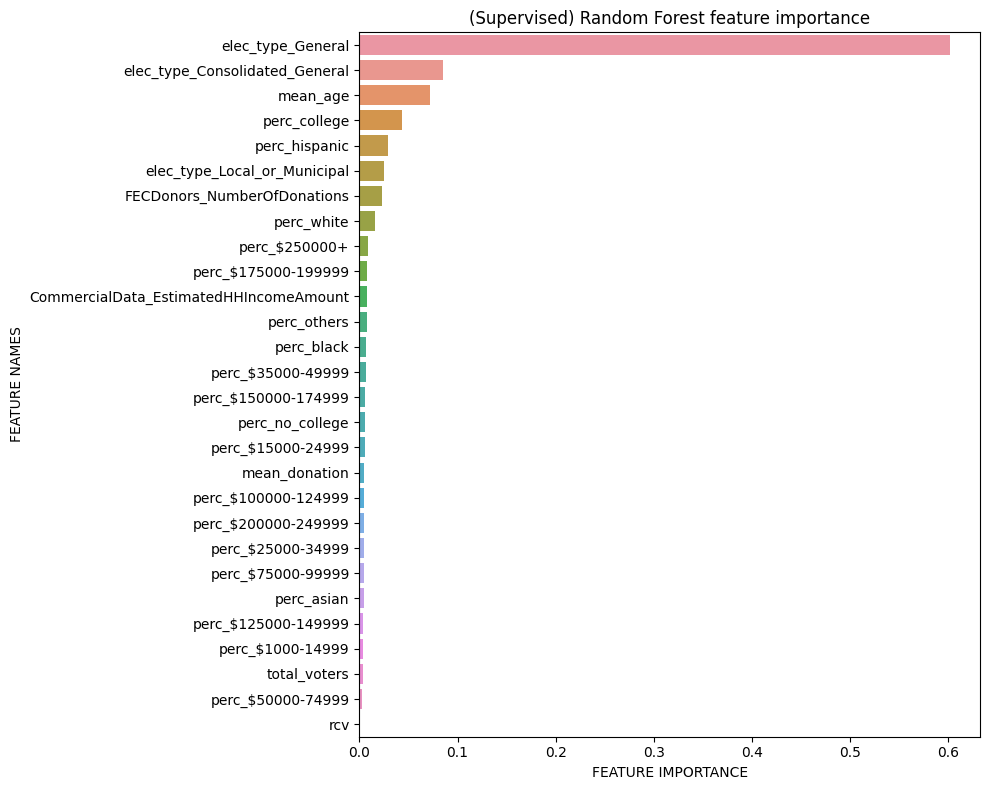

In [24]:
import seaborn as sns 
def plot_feature_importance(importance,names,fig_title, file_name):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(fig_title)
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.tight_layout()
    plt.savefig(f'../data/plots/{file_name}.jpg')

plot_feature_importance(best_model.feature_importances_, X.columns,
                        fig_title = '(Supervised) Random Forest feature importance', 
                        file_name = 'RF_feature_imp_supervised_overall')


# How does feature importance differ between RCV and Non RCV?

### RCV

In [25]:
#implement random forest
rcv_df = df[df['rcv'] == 1]
rcv_target = rcv_df['turnout']
rcv_data = rcv_df.drop(columns=['turnout', 'rcv'])

rcv_rf = RandomForestRegressor(bootstrap = True, oob_score = True, random_state = 0, 
                               max_depth= None, max_features= 16, n_estimators = 50)
rcv_rf.fit(rcv_data, rcv_target)


rcv_pred = rcv_rf.predict(rcv_data)

print("RCV Train")
def get_metrics_CV(model, data, target):

    print("Cross validation R-sqaured score:", 
          round(np.mean(cross_val_score(model, data, target, 
                                  scoring='r2', cv=10, n_jobs=-1)), 2))
    print("Cross validation Mean Absolute Error score:", 
          -round(np.mean(cross_val_score(model, data, target, 
                                   scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)), 2))
    print("Cross validation Mean Squared Error score:", 
          -round(np.mean(cross_val_score(model, data, target, 
                                   scoring='neg_mean_squared_error', cv=10, n_jobs=-1)), 2))
get_metrics_CV(rcv_rf,rcv_data, rcv_target)

RCV Train
Cross validation R-sqaured score: 0.88
Cross validation Mean Absolute Error score: 0.05
Cross validation Mean Squared Error score: 0.0


In [26]:
#generate and print ordered list of feature importance scores
rcv_sorted_features, rcv_sorted_feature_importance = ordered_feature_importance(rcv_data.columns, rcv_rf.feature_importances_, n=len(rcv_data.columns))

Feature 0 (elec_type_General) importance: 0.5268304929966059
Feature 1 (elec_type_Consolidated_General) importance: 0.2655501227768637
Feature 2 (mean_age) importance: 0.049376107952539765
Feature 3 (elec_type_Local_or_Municipal) importance: 0.02580528039701079
Feature 4 (perc_$250000+) importance: 0.01674732169013189
Feature 5 (perc_college) importance: 0.01638395338558114
Feature 6 (perc_$150000-174999) importance: 0.011167635639613524
Feature 7 (perc_hispanic) importance: 0.00884743026359966
Feature 8 (perc_no_college) importance: 0.008103741359447686
Feature 9 (mean_donation) importance: 0.006694706634181282
Feature 10 (perc_$100000-124999) importance: 0.006243838927103717
Feature 11 (perc_$15000-24999) importance: 0.006174858981728507
Feature 12 (FECDonors_NumberOfDonations) importance: 0.00614498389511496
Feature 13 (perc_$200000-249999) importance: 0.004907956721052992
Feature 14 (total_voters) importance: 0.004621261527598042
Feature 15 (perc_$75000-99999) importance: 0.0045306

In [27]:
# #plot feature importance
# plt.bar(np.arange(len(rcv_sorted_features)), rcv_sorted_feature_importance)
# plt.title('Random Forest Feature Importance')
# plt.ylabel('Feature importance')
# plt.xlabel('Ordered feature number')

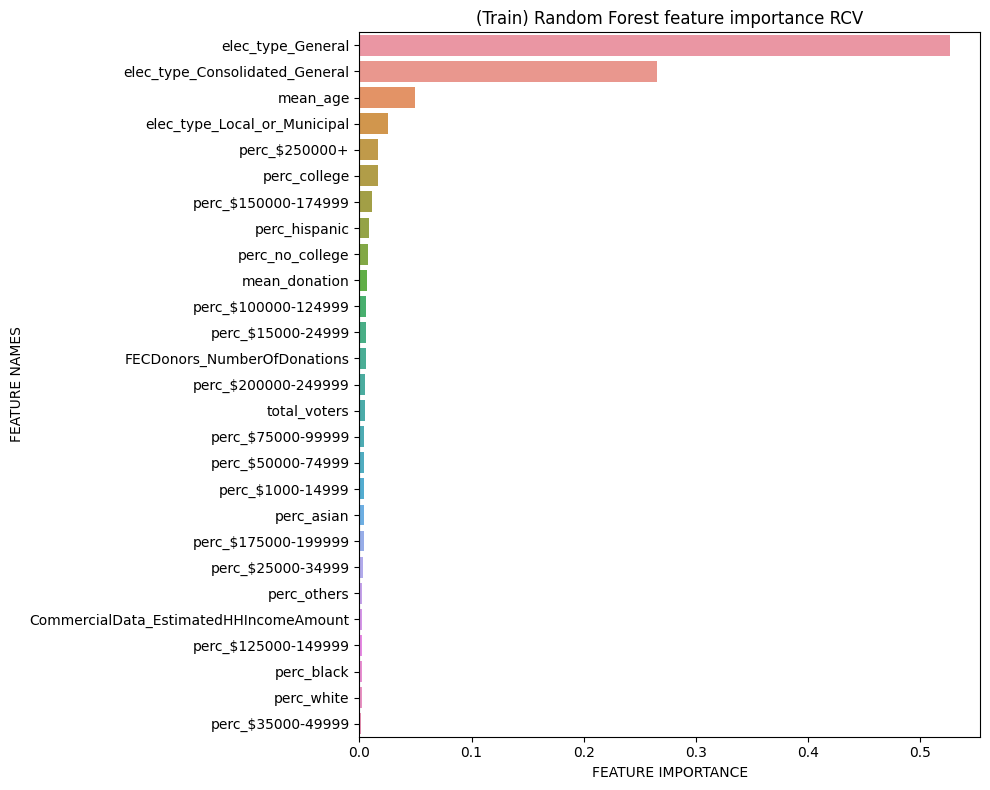

In [28]:
plot_feature_importance(rcv_rf.feature_importances_, rcv_data.columns, 
                        fig_title ='(Train) Random Forest feature importance RCV', 
                        file_name = 'RF_feature_imp_RCV')

### Non-RCV

In [29]:
#implement random forest
non_rcv_df = df[df['rcv'] == 0]
non_rcv_target = non_rcv_df['turnout']
non_rcv_data = non_rcv_df.drop(columns=['turnout', 'rcv'])

non_rcv_rf = RandomForestRegressor(bootstrap = True, random_state = 0, oob_score = True,
                                   max_depth= None, max_features= 16, n_estimators = 50)
non_rcv_rf.fit(non_rcv_data, non_rcv_target)


non_rcv_pred = non_rcv_rf.predict(non_rcv_data)

print("Non RCV Train")
get_metrics_CV(non_rcv_rf, non_rcv_data, non_rcv_target)

Non RCV Train
Cross validation R-sqaured score: 0.91
Cross validation Mean Absolute Error score: 0.05
Cross validation Mean Squared Error score: 0.0


In [30]:
#generate and print ordered list of feature importance scores
non_rcv_sorted_features, non_rcv_sorted_feature_importance = ordered_feature_importance(non_rcv_data.columns, non_rcv_rf.feature_importances_, n=len(non_rcv_data.columns))

Feature 0 (elec_type_General) importance: 0.5229417099907826
Feature 1 (elec_type_Consolidated_General) importance: 0.10907063549420823
Feature 2 (mean_age) importance: 0.08418578152743902
Feature 3 (elec_type_Local_or_Municipal) importance: 0.07184314344419637
Feature 4 (perc_college) importance: 0.04875030129109669
Feature 5 (perc_white) importance: 0.028246827333864844
Feature 6 (FECDonors_NumberOfDonations) importance: 0.02694285068402368
Feature 7 (perc_hispanic) importance: 0.02042531291966591
Feature 8 (perc_black) importance: 0.008773684743689118
Feature 9 (perc_$100000-124999) importance: 0.007588022030256005
Feature 10 (perc_others) importance: 0.007482517452015559
Feature 11 (CommercialData_EstimatedHHIncomeAmount) importance: 0.006695160942643862
Feature 12 (perc_$15000-24999) importance: 0.005616251233732615
Feature 13 (perc_$35000-49999) importance: 0.004752678437930978
Feature 14 (perc_asian) importance: 0.004730040600807637
Feature 15 (perc_$250000+) importance: 0.00467

In [31]:
# #plot feature importance
# plt.bar(np.arange(len(non_rcv_sorted_features)), non_rcv_sorted_feature_importance)
# plt.title('Random Forest Feature Importance')
# plt.ylabel('Feature importance')
# plt.xlabel('Ordered feature number')

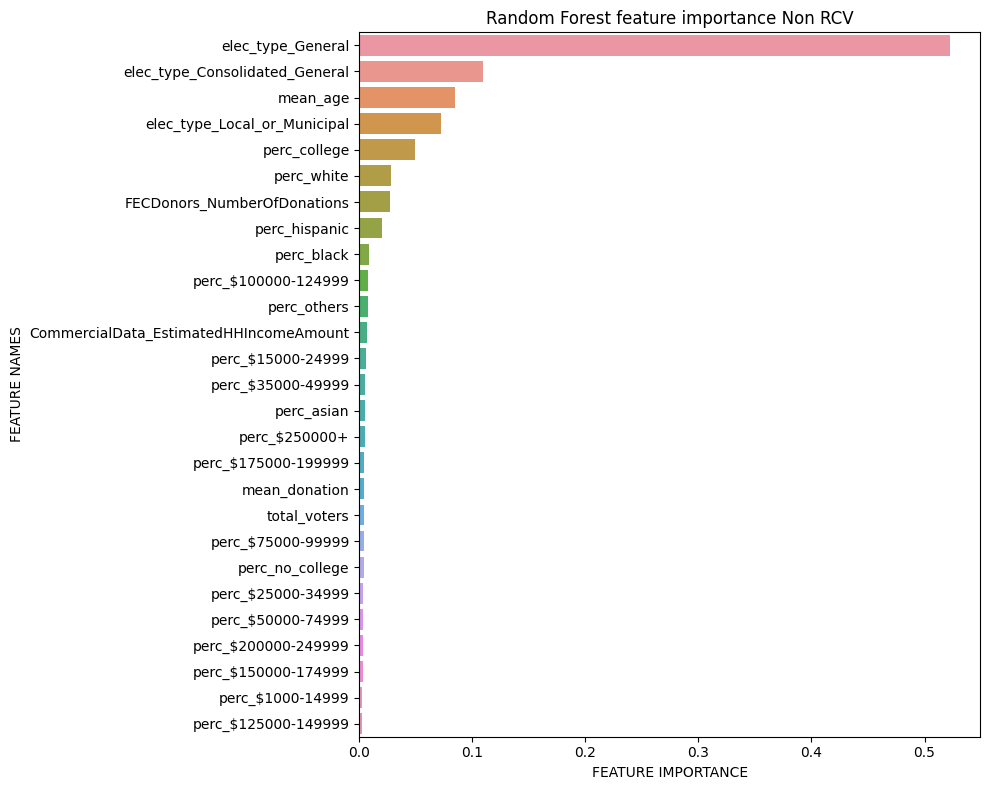

In [32]:
plot_feature_importance(non_rcv_rf.feature_importances_, non_rcv_data.columns, 
                        fig_title = 'Random Forest feature importance Non RCV', 
                        file_name = 'RF_feature_imp_Non_RCV')


### RCV vs. Non-RCV

In [33]:
#Match ranking of feature importance
rcv_v_nonrcv_df = pd.DataFrame({'rcv_feature': rcv_sorted_features, 'rcv_importance': rcv_sorted_feature_importance,
                  'non_rcv_feature': non_rcv_sorted_features, 'non_rcv_importance': non_rcv_sorted_feature_importance})
rcv_v_nonrcv_df.head(20)

,rcv_feature,rcv_importance,non_rcv_feature,non_rcv_importance
0,elec_type_General,0.526830,elec_type_General,0.522942
1,elec_type_Consolidated_General,0.265550,elec_type_Consolidated_General,0.109071
2,mean_age,0.049376,mean_age,0.084186
3,elec_type_Local_or_Municipal,0.025805,elec_type_Local_or_Municipal,0.071843
4,perc_$250000+,0.016747,perc_college,0.048750
5,perc_college,0.016384,perc_white,0.028247
6,perc_$150000-174999,0.011168,FECDonors_NumberOfDonations,0.026943
7,perc_hispanic,0.008847,perc_hispanic,0.020425
8,perc_no_college,0.008104,perc_black,0.008774
9,mean_donation,0.006695,perc_$100000-124999,0.007588


In [34]:
#Match features
nonrcv_df = pd.DataFrame({'feature': non_rcv_sorted_features, 'importance_nonrcv': non_rcv_sorted_feature_importance})
rcv_df = pd.DataFrame({'feature': rcv_sorted_features, 'importance_rcv': rcv_sorted_feature_importance})
rcv_v_nonrcv_df = nonrcv_df.merge(rcv_df, on = "feature")
rcv_v_nonrcv_df.head()

,feature,importance_nonrcv,importance_rcv
0,elec_type_General,0.522942,0.526830
1,elec_type_Consolidated_General,0.109071,0.265550
2,mean_age,0.084186,0.049376
3,elec_type_Local_or_Municipal,0.071843,0.025805
4,perc_college,0.048750,0.016384


In [35]:
rcv_v_nonrcv_df = pd.melt(rcv_v_nonrcv_df, id_vars=['feature'], value_vars=['importance_nonrcv','importance_rcv'])
rcv_v_nonrcv_df.head()

,feature,variable,value
0,elec_type_General,importance_nonrcv,0.522942
1,elec_type_Consolidated_General,importance_nonrcv,0.109071
2,mean_age,importance_nonrcv,0.084186
3,elec_type_Local_or_Municipal,importance_nonrcv,0.071843
4,perc_college,importance_nonrcv,0.048750


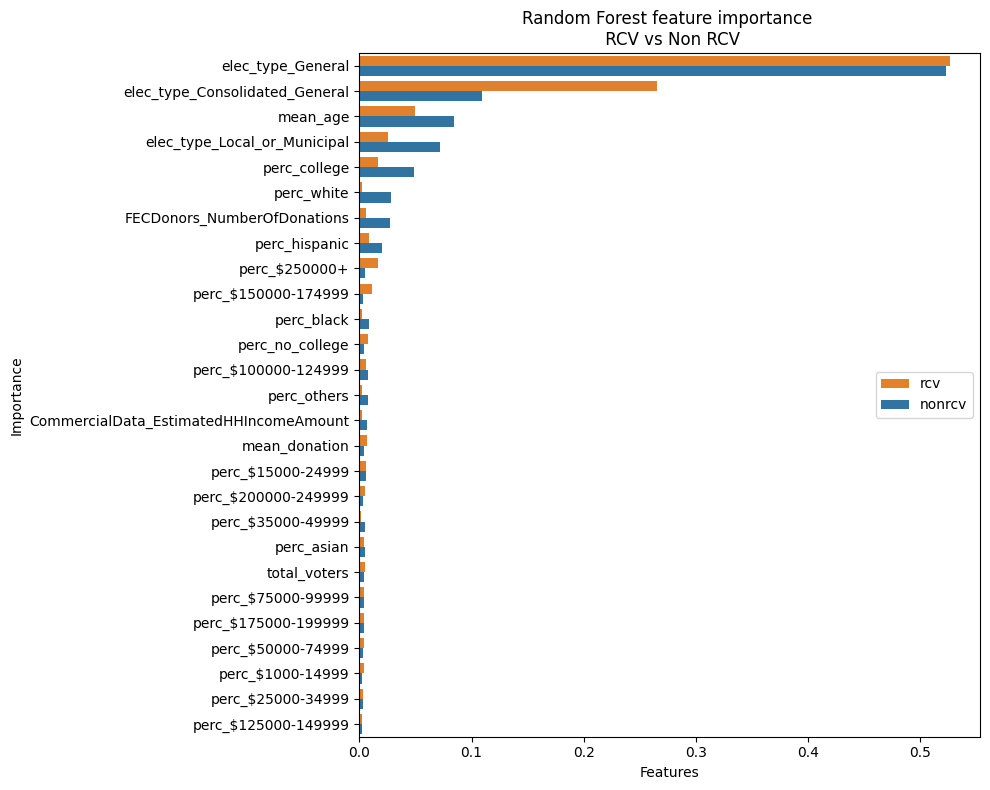

In [36]:
# Plotting
import seaborn as sns 

#Create arrays from feature importance and feature names
variable = np.array(rcv_v_nonrcv_df['variable'])
value = np.array(rcv_v_nonrcv_df['value'])
feature_names = np.array(rcv_v_nonrcv_df['feature'])

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'variable':variable,'value':value}
fi_df = pd.DataFrame(data)
fi_df = fi_df.replace({'importance_nonrcv': 'nonrcv', 'importance_rcv': 'rcv'})

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['value'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
palette ={"nonrcv": "C0", "rcv": "C1"}

sns.barplot(x=fi_df['value'], y=fi_df['feature_names'], hue = fi_df['variable'], palette=palette)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest feature importance \n RCV vs Non RCV')
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig(f'../data/plots/RF_feature_imp_RCV_vs_Non_RCV.jpg')
